# K-Nearest Neighbors(KNN)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

## User defined functions

In [2]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Exploratory Data Analysis and Visualisation

In [3]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [6]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

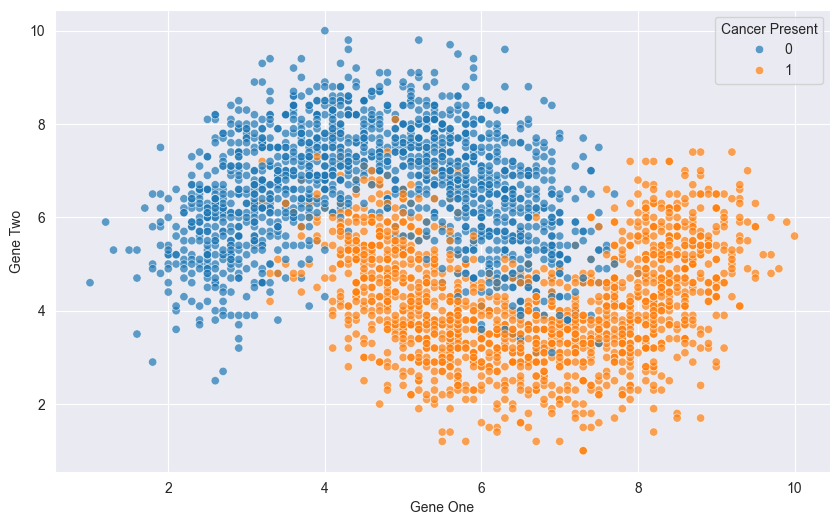

In [7]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.7);

# KNN algorithm gives much better results on datasets that are easily seperated from each other.
# On the other hand, it gives bad results with complicated data where a lot of overlapping occurs.
# For example, this data will make the most mistakes in border-boundary observations,
# that is, in places that are intricately connected to each other.

(4.0, 8.0)

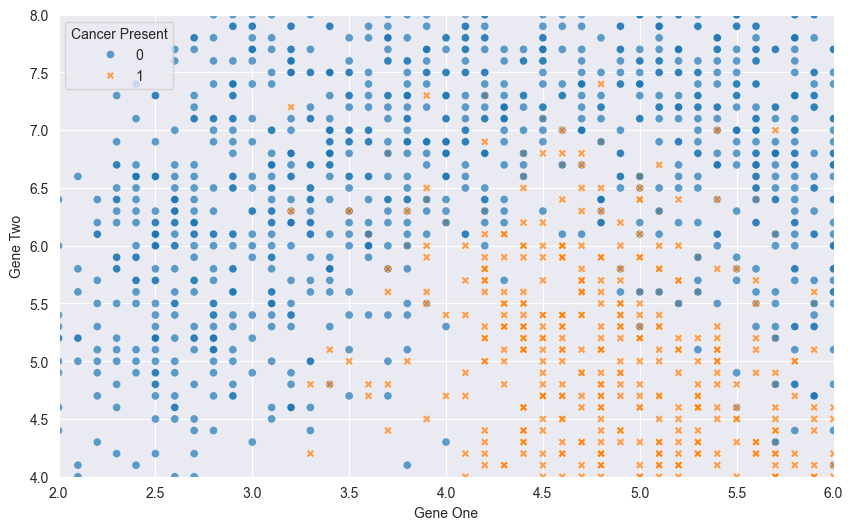

In [8]:
sns.scatterplot(x='Gene One', y='Gene Two', hue='Cancer Present', data=df, alpha=0.7, style="Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

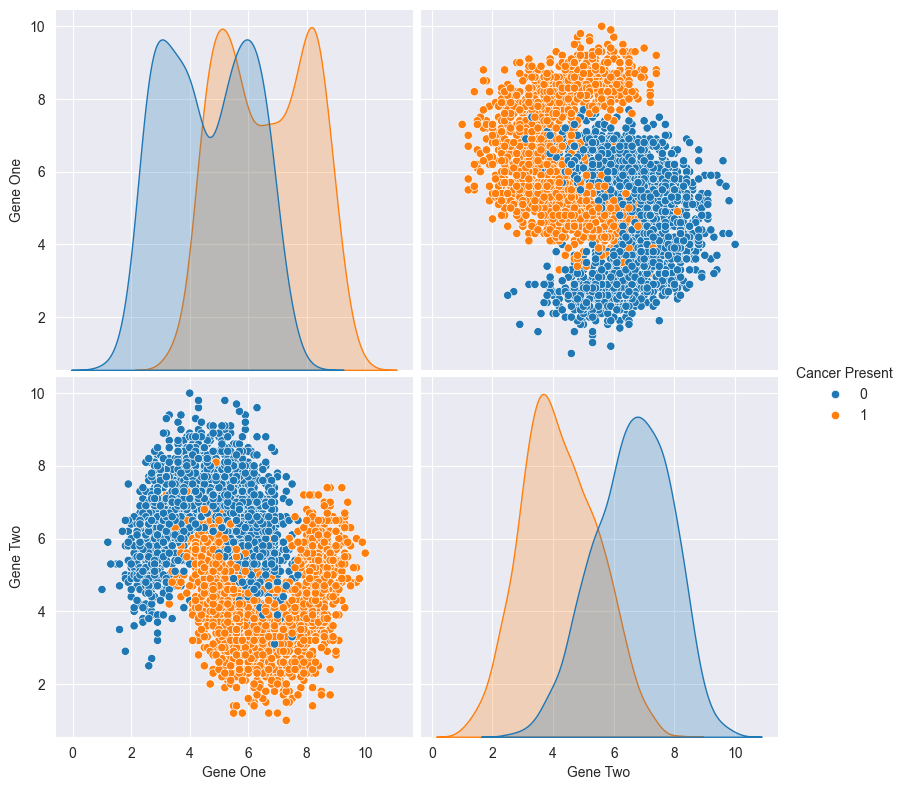

In [9]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect=1);

# Gene one feature, the 2 classes seem to be intricately related to each other by almost 50%.
# Gene two feature, the 2 class seem to be intricately related to each other by almost %25.
# Gene two feature is more distinguishing.

# Lets check these insights with Boxplot

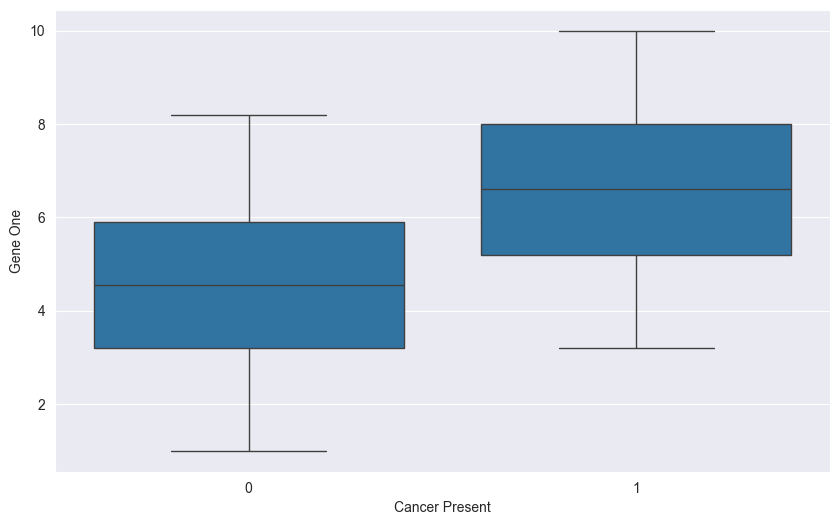

In [10]:
sns.boxplot(x='Cancer Present', y='Gene One', data=df);

# The higher the gene one, the greater the risk of getting cancer.
# In Gene one 2 classes overlap more compared to the Gene two.

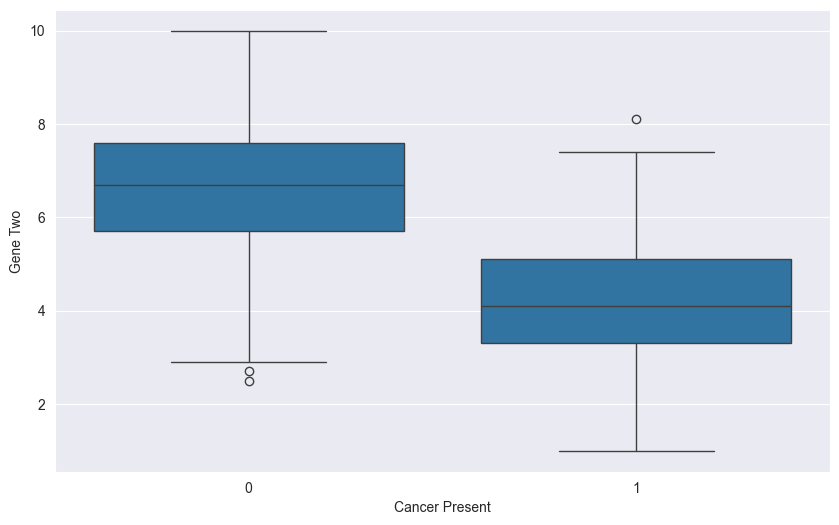

In [11]:
sns.boxplot(x='Cancer Present', y='Gene Two', data=df);

# The lower the gene two, the greater the risk of getting cancer.

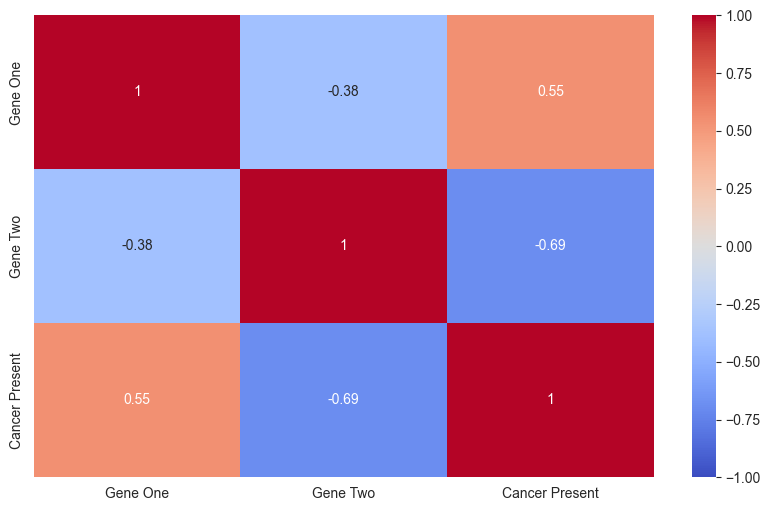

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

# We can see similar insights as we got from the boxplots.

## Train|Test Split and Scaling Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Taking basic scores with Dummy_classifier
- DummyClassifier makes predictions that ignore the input features.

- This classifier serves as a simple baseline to compare against other more
complex classifiers.


In [17]:
DummyClassifier?

In [18]:
operations = [("scaler", StandardScaler()), ("dummy", DummyClassifier(strategy="stratified"))]

dummy_model = Pipeline(steps=operations)

dummy_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('dummy', DummyClassifier(strategy='stratified'))])

In [19]:
eval_metric(dummy_model, X_train, y_train, X_test, y_test)

Test_Set
[[239 231]
 [218 212]]
              precision    recall  f1-score   support

           0       0.52      0.51      0.52       470
           1       0.48      0.49      0.49       430

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900


Train_Set
[[522 508]
 [546 524]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      1030
           1       0.51      0.49      0.50      1070

    accuracy                           0.50      2100
   macro avg       0.50      0.50      0.50      2100
weighted avg       0.50      0.50      0.50      2100


In [20]:
# Now we examined our basic score for hold-out test set, and we need to improve 0.49 accuracy of it.

## KNN Model Training

In [21]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# Since KNN is a distance-based algorithm we must scale the data
# Each class takes values in between 1-10. We can skip the scaling, but it wouldn't hurt to scale it anyway.

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [22]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [23]:
y_pred_proba = pipe_model.predict_proba(X_test)

# If `weights=uniform`, then all neighbors are equally weighted. If `weights=distance`, closer neighbors get more weight
# farther neighbors are less weighted.

# According to k neighbor value and weights hyperparameter the classes are determined.

In [24]:
pd.DataFrame(y_pred_proba)

# `weights=uniform` and `k=5` so 3 out of 5 neighbors around 895th sample belongs to class 1 (0.6)
# 2 out of 5 neighbors around 895th sample belongs to class 0 (0.4). Since it is assigned to class 1

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [25]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:, 1], "Proba_0": y_pred_proba[:, 0]}

In [26]:
pd.DataFrame.from_dict(my_dict).sample(10)

# Real class label, predicted class, probability of belonging to class 1 and probability of belonging to class 0 shown together in the same dataframe.

,Actual,Pred,Proba_1,Proba_0
2418,1,1,1.0,0.0
1691,1,1,1.0,0.0
1025,0,1,0.8,0.2
1467,0,0,0.0,1.0
2069,0,0,0.0,1.0
1572,0,0,0.0,1.0
2136,0,0,0.0,1.0
2067,0,0,0.0,1.0
168,1,1,0.8,0.2
781,1,1,1.0,0.0


## Model Performance on Classification Tasks

In [27]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]])

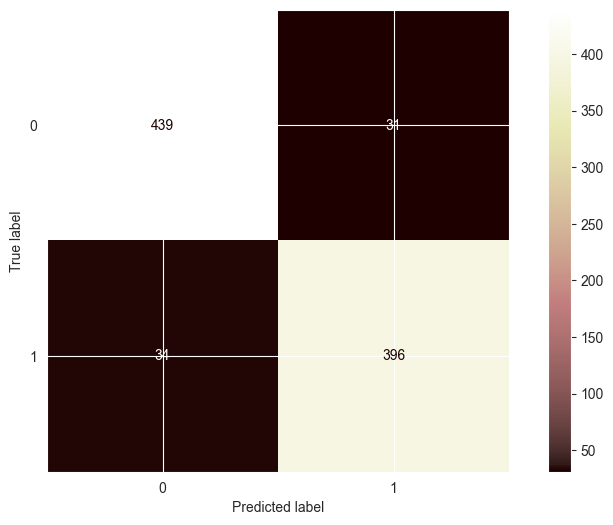

In [28]:
ConfusionMatrixDisplay.from_estimator(pipe_model,X_test, y_test, cmap='pink')

In [29]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 973   57]
 [  62 1008]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.95      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100


## Elbow Method for Choosing Reasonable K Values

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [31]:
test_error_rates = []


for k in range(1,30):

    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)

    accuracy_mean = scores["test_accuracy"].mean()

    test_error = 1 - accuracy_mean

    test_error_rates.append(test_error)

# To be able to find an optimal K value in a balanced dataset, we can use accuracy. If the dataset is imbalanced, we can use i.e. recall of the target class

# For each k between 1-30, first find the accuracy score and then subtract this accuracy score from 1 to find the error (1-acc)

# We shouldn't be using the test (hold-out set) dataset to tune hyperparameters i.e. k value as that would cause data leakage.
# We can use the train set in cross-validation to evaluate different hyperparameter values without ever using the test set. This way, we avoid the data leakage.

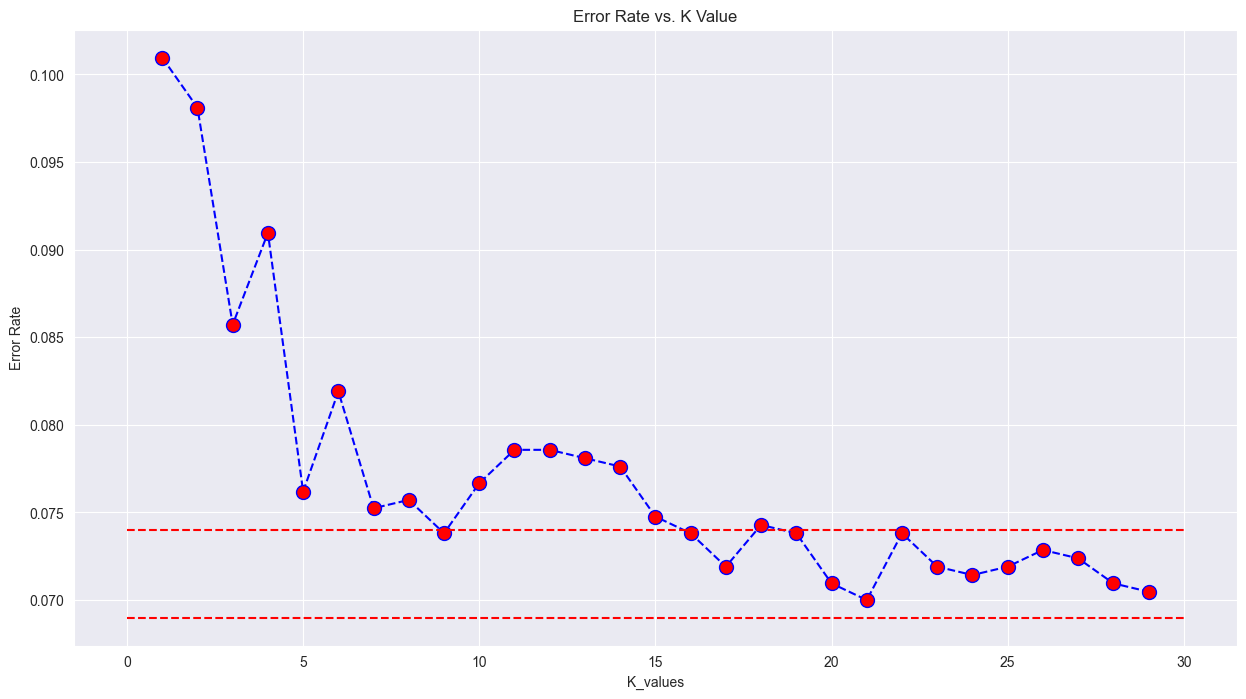

In [32]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='r', linestyles="--");

# We visualize the error scores we find.

## Overfitting and underfitting control for k values

In [33]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):

    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train,y_train)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring=['accuracy'], cv=10, return_train_score=True)

    accuracy_test_mean = scores["test_accuracy"].mean()
    accuracy_train_mean = scores["train_accuracy"].mean()


    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

# Like the same process as above. We compare the average errors of the validation and train data
# that we have obtained from the train data passed into the CV
# Thus, we will be able to see more easily whether we are dealing with overfitting or not.

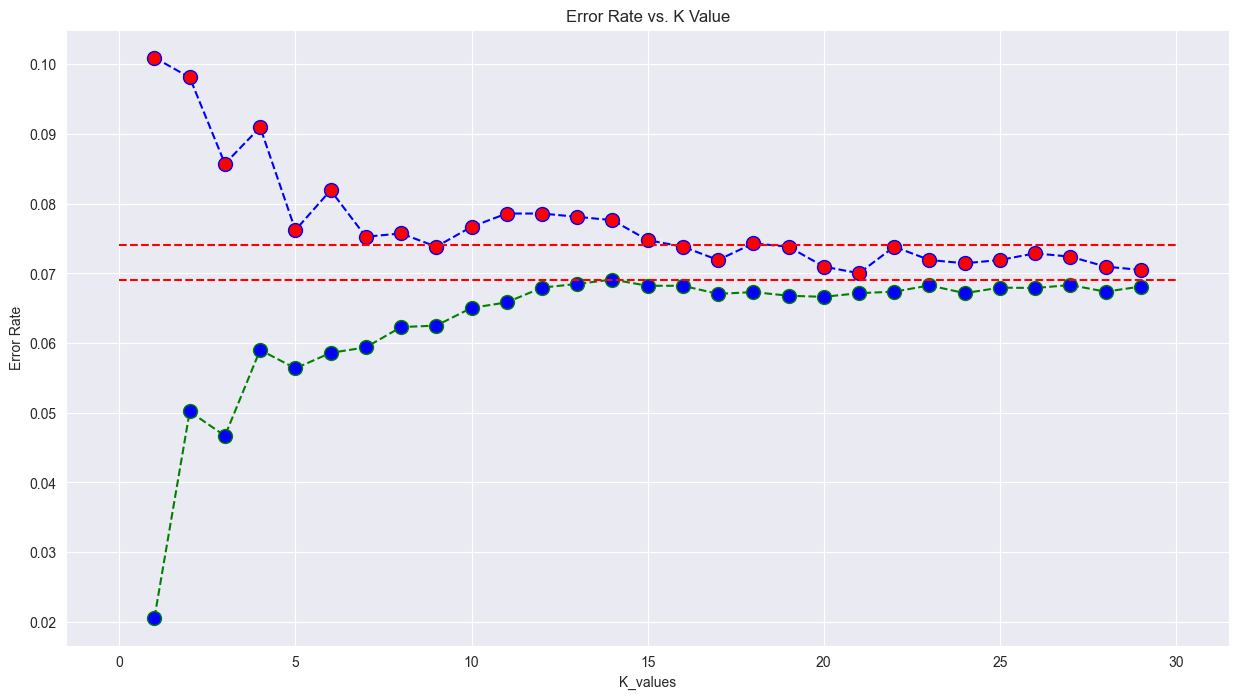

In [34]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='r', linestyles="--");

# The reds are the validation data, the blues are the scores of the train data.
# The lowest error score for the validation data was achieved at K=21, but if we choose 21, the complexity of the model, that is, the operation costs, MIGHT increase.
# While the error is 0.074 for K= 9, the error is 0.069 for K=21. For a difference of 0.005,
# is it worth risking the chance of increasing computational complexity?
# It's not worth the expense for a difference of 0.005.

# Keep in mind that the computational complexity of KNN wif the search algorithm is brute force is generally O(nd).
# This means, the value of k won't affect the computational complexity of the problem significantly. 
# However, if the search algorithm is a tree based algorithm (kd-tree or ball-tree), 
# then the value of k actually will impact the computational complexity of the model.

# At K=21, the scores are almost the same as the error scores in both validation and train data.
# However, if K=9, the error score of the validation data is 0.074, while the error score of the train data is 0.060.
# The difference is 0.014. In other words, since the difference is very small, we can choose K=9 with peace of mind.

## Scores by Various K Values

In [35]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)


WITH K=1

Test_Set
[[424  46]
 [ 49 381]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900


Train_Set
[[1008   22]
 [  26 1044]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1030
           1       0.98      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100


In [36]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=21))]
knn21 = Pipeline(steps=operations)

knn21.fit(X_train, y_train)
print('WITH K=21\n')
eval_metric(knn21, X_train, y_train, X_test, y_test) #28+21 wrong prediction

WITH K=21

Test_Set
[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  67 1003]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100


In [37]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)

knn9.fit(X_train, y_train)
print('WITH K=9\n')
eval_metric(knn9, X_train, y_train, X_test, y_test) # 28 + 24 wrong prediction

WITH K=9

Test_Set
[[445  25]
 [ 27 403]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[ 961   69]
 [  59 1011]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100


## Cross Validate For Optimal K Value

In [38]:
from sklearn.model_selection import cross_val_score, cross_validate

In [39]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.926190
train_accuracy     0.937513
test_precision     0.925520
train_precision    0.936111
test_recall        0.930841
train_recall       0.941641
test_f1            0.927892
train_f1           0.938862
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [42]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [43]:
k_values= range(1,30)

In [44]:
param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

# most important hyperparameters for KNN:
# 1. n_neighbors (In binary classification, choose k as an odd number to avoid ties. In multiclass classification, it doesn't matter.)
# 2. weights
# 3. p

In [45]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True)

In [46]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True)

In [47]:
knn_grid_model.best_estimator_
# GridsearchCV always returns the maximum metric score, which will give the lowest error score.
# Since the number of n_neighbors we will find after GridsearchCV can be very costly,
# it is best practice to choose with the elbow method.

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [48]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score         0.93
mean_train_score    0.932857
Name: 82, dtype: object

In [49]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

WITH K=21

Test_Set
[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  67 1003]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100


## Evaluating ROC Curves and AUC

In [50]:
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay

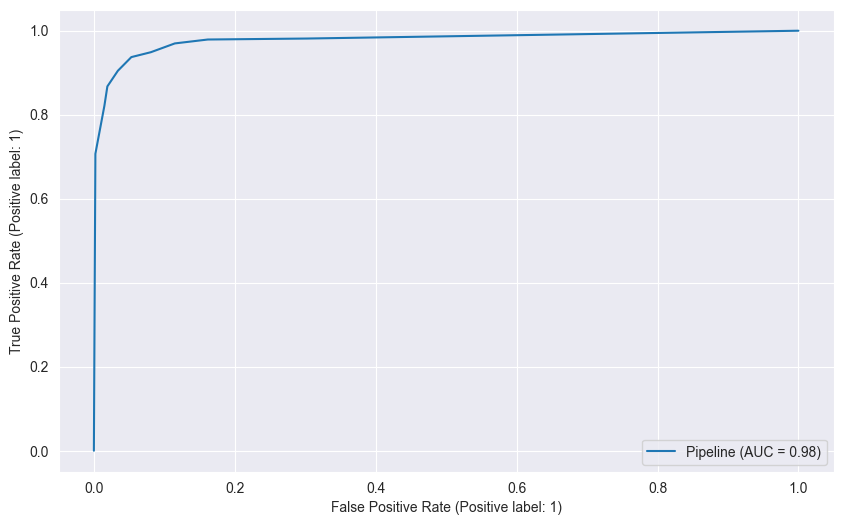

In [51]:
RocCurveDisplay.from_estimator(knn9, X_test, y_test)

In [52]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9783102424542306

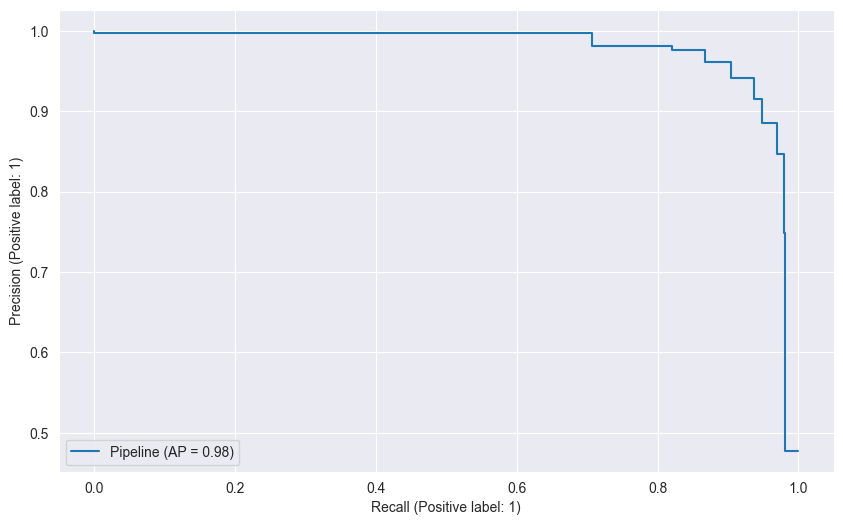

In [53]:
PrecisionRecallDisplay.from_estimator(knn9, X_test, y_test);

## Final Model and Model Deployment

In [54]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [55]:
import pickle

In [56]:
pickle.dump(final_model, open('knn_final_model', 'wb'))

## Predict New Observations

In [57]:
loaded_model = pickle.load(open('knn_final_model', 'rb'))

In [58]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [59]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [60]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [61]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [62]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000
